In [133]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

# Data Pre-Processing 

In [136]:
loan_data_01 = pd.read_csv(r'C:\Users\steve\OneDrive\Bureaublad\LoanPrediction_Trainset.csv', parse_dates=True, delimiter=',')
# Make sure to display the personal file path on pc or laptop, and have the comma (,) sign as the delimiter. 
display(loan_data_01)

,Unnamed: 0,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### Question 4: Missing values

In [139]:
# check for missing values in the dataset and list them
loan_data_01.isna().sum()


Unnamed: 0            0
LoanID                0
Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
CreditHistory        50
PropertyArea          0
LoanStatus            0
dtype: int64

In [141]:
# Displaying the datatypes, for identifying whether the columns values are in int, object, string, or float. Also dropping the column Unnamed: 0, because its an redundant index column not containing any useful data. 
# It is for identifying numerical values (int and float) to replace by the mean and catagorical values (object) to be replaced by a corresponding categorical value.
loan_data_02 = loan_data_01.drop(columns=['Unnamed: 0'])
loan_data_02.dtypes

LoanID                object
Gender                object
Married               object
Dependents            object
Education             object
SelfEmployed          object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
LoanAmountTerm       float64
CreditHistory        float64
PropertyArea          object
LoanStatus            object
dtype: object

In [143]:
loan_data_02.isna().sum()

LoanID                0
Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
CreditHistory        50
PropertyArea          0
LoanStatus            0
dtype: int64

In [145]:
# Filling the missing values with either the mean for a column with numerical values, or the mode if the column values were categorical.
# Source: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

loan_data_02['Gender'] = loan_data_02['Gender'].fillna(loan_data_02['Gender'].mode()[0])
loan_data_02['Married'] = loan_data_02['Married'].fillna(loan_data_02['Married'].mode()[0])
loan_data_02['Dependents'] = loan_data_02['Dependents'].fillna(loan_data_02['Dependents'].mode()[0])
loan_data_02['SelfEmployed'] = loan_data_02['SelfEmployed'].fillna(loan_data_02['SelfEmployed'].mode()[0])
loan_data_02['LoanAmount'] = loan_data_02['LoanAmount'].fillna(loan_data_02['LoanAmount'].mean())
loan_data_02['LoanAmountTerm'] = loan_data_02['LoanAmountTerm'].fillna(loan_data_02['LoanAmountTerm'].mode()[0])
loan_data_02['CreditHistory'] = loan_data_02['CreditHistory'].fillna(loan_data_02['CreditHistory'].mode()[0])




In [147]:
print(loan_data_02.to_string())

       LoanID  Gender Married Dependents     Education SelfEmployed  ApplicantIncome  CoapplicantIncome  LoanAmount  LoanAmountTerm  CreditHistory PropertyArea LoanStatus
0    LP001002    Male      No          0      Graduate           No             5849           0.000000  146.412162           360.0            1.0        Urban          Y
1    LP001003    Male     Yes          1      Graduate           No             4583        1508.000000  128.000000           360.0            1.0        Rural          N
2    LP001005    Male     Yes          0      Graduate          Yes             3000           0.000000   66.000000           360.0            1.0        Urban          Y
3    LP001006    Male     Yes          0  Not Graduate           No             2583        2358.000000  120.000000           360.0            1.0        Urban          Y
4    LP001008    Male      No          0      Graduate           No             6000           0.000000  141.000000           360.0            1.

In [149]:
#Check whether there are still missing values present
loan_data_02.isna().sum()

LoanID               0
Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64

### Question 5: Listing the variables with categorical values and encoding these values into numeric values

In [152]:
# Listing the categorical variables
# Source: https://medium.com/@gkkhnyldz/how-to-explore-and-summarize-categorical-variables-in-a-dataframe-with-python-585989cb62e
Categorical_columns = [col for col in loan_data_02.columns if str(loan_data_02[col].dtypes) in ["category", "object", "bool"]]
print(Categorical_columns)



['LoanID', 'Gender', 'Married', 'Dependents', 'Education', 'SelfEmployed', 'PropertyArea', 'LoanStatus']


In [154]:
loan_data_02 = loan_data_02.drop(columns=['LoanID']) 
# The data column LoanID was dropped since it contained all unique identification values, that can in practice being traced back to an individual, / 
# and all the catagorical values are distinct. 
# Also the Unnamed:0 column was removed, because it does not contain useful data for data extraction purposes. 

In [156]:
# All object datatypes needed to be labeled and transfromed to integer data types in order to obtain the basic summary of all the relevant data columns 
loan_data_03 = loan_data_02
loan_data_03['LoanStatus'] = loan_data_02['LoanStatus'].map(dict(Y=1, N=0))
loan_data_03['Gender'] = loan_data_02['Gender'].map(dict(Male=1, Female=0))
loan_data_03['Married'] = loan_data_02['Married'].map(dict(Yes=1, No=0))
loan_data_03['SelfEmployed'] = loan_data_02['SelfEmployed'].map(dict(Yes=1, No=0))
loan_data_03['PropertyArea'] = loan_data_02['PropertyArea'].map(dict(Rural=0, Semiurban=1, Urban=2))


In [158]:
from sklearn.preprocessing import LabelEncoder

In [160]:
# The data columns Dependents and Education couldnt be transformed by the standard python map function, so a more advanced method was applied (fit_transform)
# For info on the method, source: https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe

le = LabelEncoder()
loan_data_03['Dependents'] = le.fit_transform(loan_data_02['Dependents'])
loan_data_03['Education'] = le.fit_transform(loan_data_02['Education'])



In [162]:
display(loan_data_03)

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


### Question 6: Number of instances in the LoanStatus variable, and upsampling minority class

In [165]:
display(loan_data_01)

,Unnamed: 0,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [167]:
print(loan_data_01['LoanStatus'].value_counts())

LoanStatus
Y    422
N    192
Name: count, dtype: int64


In [169]:
# Displaying the two class sizes before resampling

Yes_class = loan_data_01[loan_data_01['LoanStatus'] == 'Y'] 
No_class = loan_data_01[loan_data_01['LoanStatus'] == 'N']

print(Yes_class.shape)
print(No_class.shape)


(422, 14)
(192, 14)


In [171]:
# Upsampling the minority class with sklearn resample method
# More info about the resampling method, source: https://wellsr.com/python/upsampling-and-downsampling-imbalanced-data-in-python/

from sklearn.utils import resample
no_upsample = resample(No_class,
             replace=True,
             n_samples=len(Yes_class),
             random_state=42)

print(no_upsample.shape)

(422, 14)


In [173]:
# Displaying the new Yes and No class sizes

print(Yes_class.shape)
print(no_upsample.shape)

(422, 14)
(422, 14)


<Axes: ylabel='Class representation'>

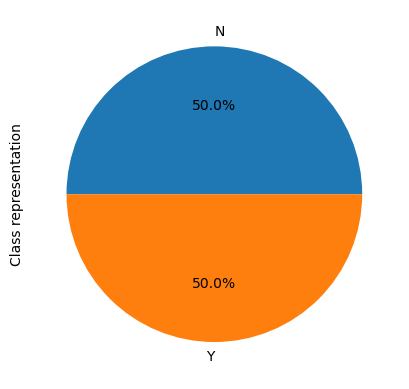

In [175]:
# Visualizing the new class representations

data_upsampled = pd.concat([Yes_class, no_upsample])

#print(data_upsampled['LoanStatus'].value_counts())

data_upsampled.groupby('LoanStatus').size().plot(kind='pie',
                                       y = "LoanStatus",
                                       label = "Class representation",
                                       autopct='%1.1f%%')

# Feature Engineering

In [178]:
display(loan_data_02)


,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


### Question 7: TotalIncome feature

In [181]:
# Adding the new feature TotalIncome, and also moving the new column to the eight column position place

# Source: https://saturncloud.io/blog/how-to-sum-two-columns-in-a-pandas-dataframe/
# Source: https://saturncloud.io/blog/pandas-tips-reorder-columns/#:~:text=To%20move%20a%20column%20to,modifies%20the%20DataFrame%20in%2Dplace.&text=In%20summary%2C%20depending%20on%20the,columns%20to%20the%20desired%20order.

loan_data_02['TotalIncome'] = loan_data_02['ApplicantIncome'] + loan_data_02['CoapplicantIncome']

TI_column = loan_data_02.pop('TotalIncome')
loan_data_02.insert(7, TI_column.name, TI_column)



In [183]:
display(loan_data_02)

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,1,0,0,0,0,5849,0.0,5849.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,6091.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,3000.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,4941.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,6000.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,2900.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,4106.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,8312.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,7583.0,187.000000,360.0,1.0,2,1


### Question 8: InstalmentAmount feature

In [186]:

loan_data_02['LoanAmount'] = loan_data_02['LoanAmount'] * 1000
loan_data_02['LoanAmount'] = round(loan_data_02['LoanAmount'], 2)
loan_data_02['InstalmentAmount'] = loan_data_02['LoanAmount'] / loan_data_02['LoanAmountTerm']
loan_data_02['InstalmentAmount'] = round(loan_data_02['InstalmentAmount'], 2)

# moving the new variable feature to the tenth column position
IA_column = loan_data_02.pop('InstalmentAmount')
loan_data_02.insert(10, IA_column.name, IA_column)


In [188]:
display(loan_data_02) 

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount,LoanAmountTerm,InstalmentAmount,CreditHistory,PropertyArea,LoanStatus
0,1,0,0,0,0,5849,0.0,5849.0,146412.16,360.0,406.70,1.0,2,1
1,1,1,1,0,0,4583,1508.0,6091.0,128000.00,360.0,355.56,1.0,0,0
2,1,1,0,0,1,3000,0.0,3000.0,66000.00,360.0,183.33,1.0,2,1
3,1,1,0,1,0,2583,2358.0,4941.0,120000.00,360.0,333.33,1.0,2,1
4,1,0,0,0,0,6000,0.0,6000.0,141000.00,360.0,391.67,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,2900.0,71000.00,360.0,197.22,1.0,0,1
610,1,1,3,0,0,4106,0.0,4106.0,40000.00,180.0,222.22,1.0,0,1
611,1,1,1,0,0,8072,240.0,8312.0,253000.00,360.0,702.78,1.0,2,1
612,1,1,2,0,0,7583,0.0,7583.0,187000.00,360.0,519.44,1.0,2,1


### Question 9: BalancedIncome feature

In [191]:
loan_data_02['BalancedIncome'] = loan_data_02['TotalIncome'] - loan_data_02['InstalmentAmount'] 

# moving the new variable feature to the eleventh column position
BI_column = loan_data_02.pop('BalancedIncome')
loan_data_02.insert(11, BI_column.name, BI_column)


In [193]:
display(loan_data_02) 

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount,LoanAmountTerm,InstalmentAmount,BalancedIncome,CreditHistory,PropertyArea,LoanStatus
0,1,0,0,0,0,5849,0.0,5849.0,146412.16,360.0,406.70,5442.30,1.0,2,1
1,1,1,1,0,0,4583,1508.0,6091.0,128000.00,360.0,355.56,5735.44,1.0,0,0
2,1,1,0,0,1,3000,0.0,3000.0,66000.00,360.0,183.33,2816.67,1.0,2,1
3,1,1,0,1,0,2583,2358.0,4941.0,120000.00,360.0,333.33,4607.67,1.0,2,1
4,1,0,0,0,0,6000,0.0,6000.0,141000.00,360.0,391.67,5608.33,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,2900.0,71000.00,360.0,197.22,2702.78,1.0,0,1
610,1,1,3,0,0,4106,0.0,4106.0,40000.00,180.0,222.22,3883.78,1.0,0,1
611,1,1,1,0,0,8072,240.0,8312.0,253000.00,360.0,702.78,7609.22,1.0,2,1
612,1,1,2,0,0,7583,0.0,7583.0,187000.00,360.0,519.44,7063.56,1.0,2,1
